## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
print(X.isna().sum())
print('\nПропущенных значений нет')


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Пропущенных значений нет


In [ ]:
print(X.dtypes)
print('\nКатегориальных переменных нет')

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Категориальных переменных нет


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [2]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, stratify = y)

NameError: name 'X' is not defined

**Вывод:** Важно использовать stratify при разбиении, так как в случае дисбаланса классов это позволяет сохранить пропорции классов таргета в обеих тренировочной и тестовой выборках, таким образом, выборки будут отражать этот дисбаланс. Если stratify не использовать, то есть вероятность получить нерепрезентативные выборки, что может повлиять на качество модели при обучении и тестировании.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train_subset = X_train[['alcohol', 'magnesium']] # для обучения используем только два признака
X_test_subset = X_test[['alcohol', 'magnesium']]

scaler = StandardScaler()
X_train_subset_transform = scaler.fit_transform(X_train_subset) # масштабируем признаки
X_test_subset_transform = scaler.transform(X_test_subset)

df = pd.DataFrame(columns = ['NN', 'Train', 'Test']) # создаем таблицу, в которой будем сохранять результаты обучения
list = []

for NN in [1, 3, 5, 10, 15, 25]:
  knn = KNeighborsClassifier(n_neighbors = NN, metric="euclidean") # вводим параметры классификатора
  fit = knn.fit(X_train_subset_transform, y_train) # обучаем классификатор на train
  list.append(fit) # сохраняем обученные классификаторы для следующего задания
  y_predicted_train = knn.predict(X_train_subset_transform) # применяем классификатор на train
  y_predicted_test = knn.predict(X_test_subset_transform) # применяем классификатор на test
  accuracy_train = np.mean(y_train == y_predicted_train) # вычисляем долю правильных ответов на train
  accuracy_test = np.mean(y_test == y_predicted_test) # вычисляем долю правильных ответов на test
  new_row = pd.DataFrame({'NN': [NN], 'Train': [round(accuracy_train, ndigits = 2)], 'Test': [round(accuracy_test, ndigits = 2)]}) # создаем новую строчку для таблицы
  df = pd.concat([df, new_row], ignore_index = True) # добавляем новую строчку в таблицу
print(df)

   NN  Train  Test
0   1   1.00  0.69
1   3   0.81  0.74
2   5   0.78  0.78
3  10   0.73  0.80
4  15   0.69  0.67
5  25   0.71  0.74


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

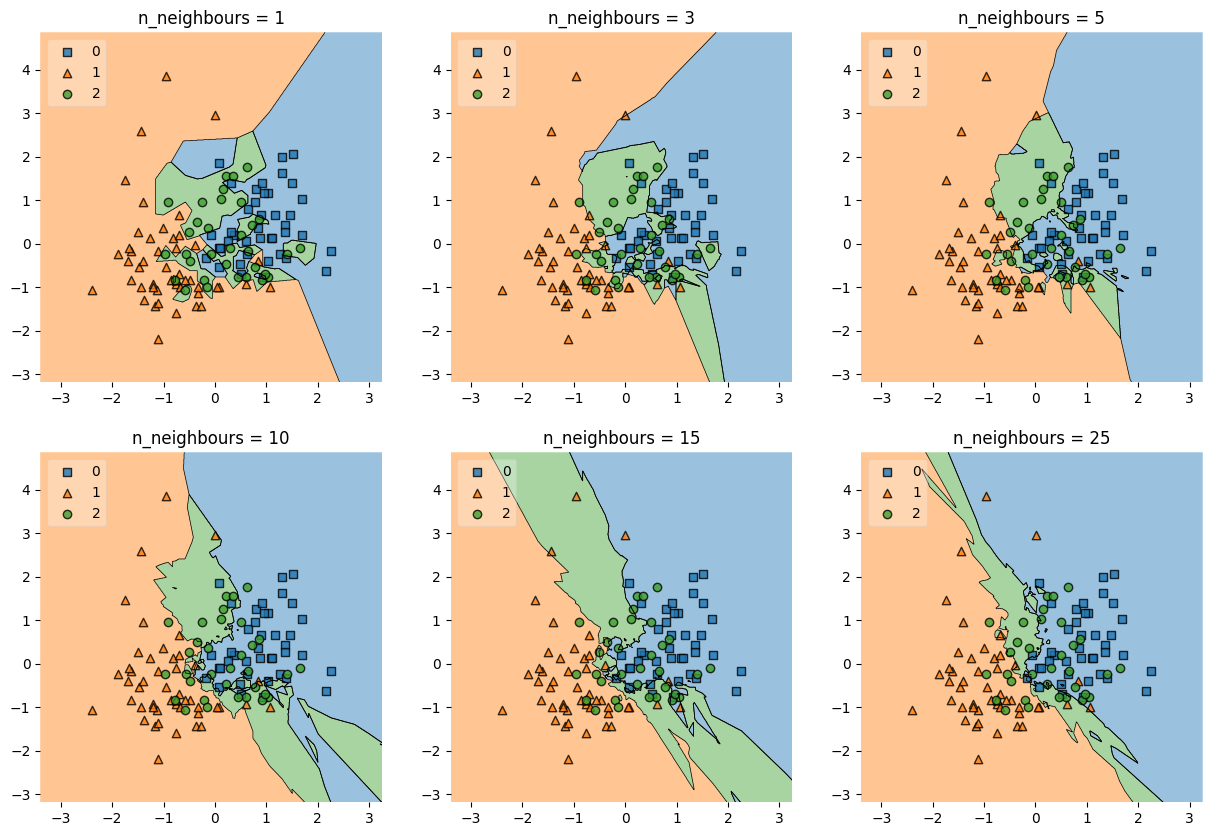

In [ ]:
# у меня исполнение кода заняло 7 минут
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3) # 2 строки 3 столбца

fig = plt.figure(figsize=(15,10))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for clf, lab, grd in zip(list,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)): # по три графика в каждой из двух строк

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_subset_transform, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

**Вывод:** По результатам, полученным в задании 1.3, можно выделить хорошие показатели доли правильных ответов на тестовой и тренировочной выборках у классификаторов с 3, 5 и 15 ближайшими соседями.

По графикам в задании 1.5 можно сделать вывод, что 15 и 25 ближайших соседей использовать неоптимально, так как многие объекты находятся не в зоне своего цвета, что говорит об неэффективности классификатора.

На графике с 1 ближайшим соседом видно, что модель идеально справилась с тренировочной выборкой, но в таком случае на тестовой выборке мы получаем низкую долю правильных ответов, что говорит о переобученности модели.

Классификаторы с 3, 5 и 10 ближайшими соседями справились довольно хорошо как в задании 1.3, так и в задании 1.5, но оптимальным мы выберем k = 5, так как при таком количестве ближайших соседей классификатор выдает высокие доли правильных ответов и на тестовой, и на обучающей выборках (0.78), а при k = 3 и k = 10 есть перекос качества на одну из выборок.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

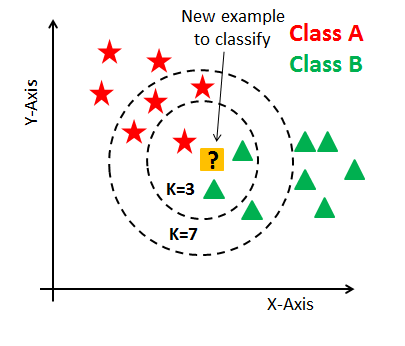

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      predictions = []
      for i in X:
        distances = [self.count_distance(i, X_train) for X_train in self.X_train] # для текущего элемента i вычисляются расстояния до всех элементов обучающей выборки X_train
        k_nearest_indexes = np.argsort(distances)[:self.k] # выбираются индексы k ближайших соседей текущего элемента i (расстояния сортируются и выбирается k наименьших)
        targets = self.y_train[k_nearest_indexes] # для выбранных индексов k ближайших соседей извлекаются соответствующие таргеты обучающей выборки y_train
        predictions.append(np.bincount(targets).argmax()) # для класса каждого извлеченного таргета подсчитывается количество вхождений этого класса (bincount), и в список добавляется индекс самого популярного класса (argmax)
      return np.array(predictions)

    def count_distance(self, x, y):
      return np.sqrt(np.sum((x - y) ** 2)) # Евклидова метрика

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [4]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('/content/diamonds.csv')
data.head(5)

Saving diamonds.csv to diamonds.csv


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [5]:
print(data.isna().sum())
print('\nПропущенных значений нет')

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропущенных значений нет


In [6]:
print('Есть один бессмысленный столбец - Index counter (Unnamed: 0). Удалим его.')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(5)

Есть один бессмысленный столбец - Index counter (Unnamed: 0). Удалим его.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [7]:
data.corr(numeric_only = True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Вывод:** c целевой переменной (price) больше всего коррелируют вещественные признаки: carat (вес бриллианта в каратах), x (длина в мм), y (ширина в мм) и z (высота в мм). Остальные признаки имеют очень слабую корреляцию с таргетом.

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [8]:
data_new = pd.get_dummies(data, columns = ['cut', 'color', 'clarity'], drop_first = False)
data_new

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [9]:
y = data_new['price'].to_numpy() # отделяем таргет от признаков
X = data_new.drop('price', axis=1) # отделяем признаки от таргетов

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [10]:
scaler = StandardScaler()
X_train_transform = scaler.fit_transform(X_train) # масштабируем признаки
X_test_transform = scaler.transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_transform, y_train) # обучаем модель на train

y_train_pred = lr.predict(X_train_transform) # применяем модель на train
y_test_pred = lr.predict(X_test_transform) # применяем модель на test

mse_train = mean_squared_error(y_train, y_train_pred) # вычисляем MSE на train
mse_test = mean_squared_error(y_test, y_test_pred) # вычисляем MSE на test

print('MSE на train:', mse_train)
print('MSE на test:', mse_test)

MSE на train: 1265233.6240300157
MSE на test: 1304701.2130459542


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [12]:
print('Оценки коэффициентов:\n')
for coef, feat in zip(lr.coef_, X_train):
    print(f'{feat}: {coef}')
print('Свободный член:', lr.intercept_)

Оценки коэффициентов:

carat: 5396.731561385887
depth: -98.10857008795233
table: -62.13358913238907
x: -1224.7199275311996
y: 12.815722419800673
z: -20.690852238404513
cut_Fair: -120.73736154967145
cut_Good: -39.18576250803381
cut_Ideal: 54.17984976689247
cut_Premium: 12.774864539161268
cut_Very Good: -0.6244014259514494
color_D: 205.24954263059854
color_E: 158.35284727153856
color_F: 135.57932000428102
color_G: 62.14332160846177
color_H: -124.55821863762104
color_I: -248.6063394620473
color_J: -390.5537435867012
clarity_I1: -460.82697557723645
clarity_IF: 236.89528538874043
clarity_SI1: -148.00570680149144
clarity_SI2: -490.1661003210794
clarity_VS1: 202.59382177658466
clarity_VS2: 108.02543493288962
clarity_VVS1: 242.37706504097477
clarity_VVS2: 275.4275419639293
Свободный член: 3914.9228243021344


**Вывод:** Оценки коэффициентов у вещественных переменных carat (вес бриллианта в каратах) и x (длина в мм) по модулю значительно превышают оценки прочих вещественных переменных.

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [13]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(10).fit(X_train_transform, y_train) # обучаем модель Lasso на train
print('Lasso')
print('MSE на train:', mean_squared_error(y_train, lasso.predict(X_train_transform)))
print('MSE на test:', mean_squared_error(y_test, lasso.predict(X_test_transform)))
print('\nОценки коэффициентов:\n')
for coef, feat in zip(lasso.coef_, X_train):
    print(f'{feat}: {coef}')
print('Свободный член:', lasso.intercept_)

Lasso
MSE на train: 1277051.6800848302
MSE на test: 1309261.8595038962

Оценки коэффициентов:

carat: 4903.779227459253
depth: -63.61155095152369
table: -47.84367194732779
x: -732.6793982871902
y: -0.0
z: -27.658833798201137
cut_Fair: -121.36887037911144
cut_Good: -39.29901054980502
cut_Ideal: 47.48419099020547
cut_Premium: 0.0
cut_Very Good: -0.0
color_D: 137.35879774128088
color_E: 82.87279787672946
color_F: 59.61545804214236
color_G: -0.0
color_H: -172.4305351202987
color_I: -280.2289047842556
color_J: -407.498794181851
clarity_I1: -477.9303385233544
clarity_IF: 184.55798453577853
clarity_SI1: -259.6910666940216
clarity_SI2: -579.2517574683532
clarity_VS1: 96.91831996718813
clarity_VS2: -0.0
clarity_VVS1: 173.03924903633305
clarity_VVS2: 194.18143533740889
Свободный член: 3914.9228243021344


In [14]:
ridge = Ridge(10).fit(X_train_transform, y_train) # обучаем модель Ridge на train
print('\nRidge')
print('MSE на train:', mean_squared_error(y_train, ridge.predict(X_train_transform)))
print('MSE на test:', mean_squared_error(y_test, ridge.predict(X_test_transform)))
print('\nОценки коэффициентов:\n')
for coef, feat in zip(ridge.coef_, X_train):
    print(f'{feat}: {coef}')
print('Свободный член:', ridge.intercept_)


Ridge
MSE на train: 1265306.613568954
MSE на test: 1303856.697756569

Оценки коэффициентов:

carat: 5356.030103494228
depth: -95.30515449008315
table: -61.775654382201786
x: -1176.4329345491774
y: 8.59984981240678
z: -25.15490971679729
cut_Fair: -120.96101659267845
cut_Good: -39.325356776757744
cut_Ideal: 54.18672432752224
cut_Premium: 12.759587882265537
cut_Very Good: -0.42889958120777444
color_D: 205.00289603515478
color_E: 158.11289502928383
color_F: 135.09686390021471
color_G: 61.86360407764563
color_H: -124.34878103263785
color_I: -247.95148912015193
color_J: -389.65082310837704
clarity_I1: -460.34438524575063
clarity_IF: 237.28599687318828
clarity_SI1: -148.60198381490002
clarity_SI2: -490.1043864391765
clarity_VS1: 202.43355423961327
clarity_VS2: 107.85468015839996
clarity_VVS1: 242.94356719775868
clarity_VVS2: 275.7426928209744
Свободный член: 3914.9228243021344


**Вывод:** При Ridge-регрессии веса снизились незначительно и равномерно по сравнению с изначальной регрессией, MSE на тестовой выборке стал чуть меньше.

При Lasso-регрессии веса сильно уменьшились (особенно для переменных carat и x) по сравнению с изначальной регрессией, а некоторые из них занулились из-за небольшой значимости этих признаков, тем самым регуляризация помогла справиться с мультиколлинеарностью, которая проявлялась в изначальной регрессии, так как у нее были большие веса и MSE. Однако при Lasso-регрессии MSE на тестовой выборке стал чуть больше, что может быть следствием выбора неоптимального параметра alpha = 10.

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

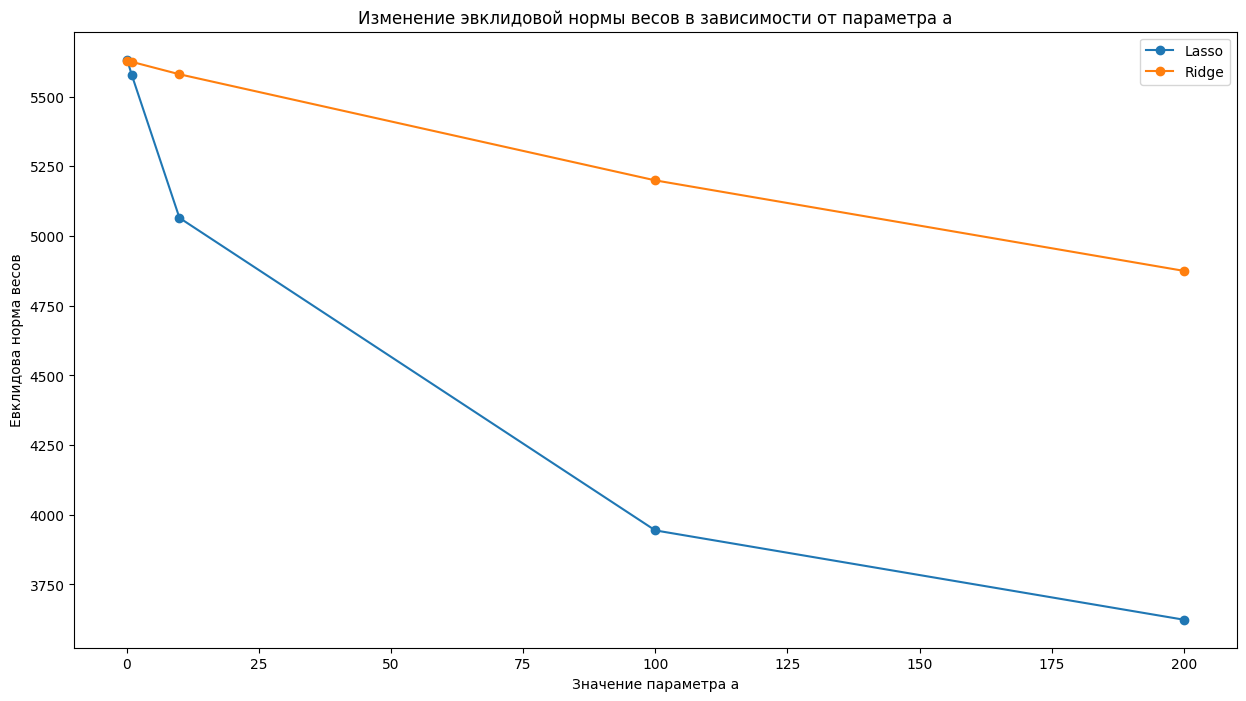

In [15]:
norm_lasso = []
norm_ridge = []
a_list = [0.1, 1, 10, 100, 200]
for a in a_list:
  lasso = Lasso(a).fit(X_train_transform, y_train)
  norm_lasso.append(np.linalg.norm(lasso.coef_)) # вычисляем евклидовой норму весов у Lasso и добавляем в список
  ridge = Ridge(a).fit(X_train_transform, y_train)
  norm_ridge.append(np.linalg.norm(ridge.coef_)) # вычисляем евклидовой норму весов у Ridge и добавляем в список

plt.figure(figsize = (15, 8))
plt.plot(a_list, norm_lasso, label='Lasso', marker='o')
plt.plot(a_list, norm_ridge, label='Ridge', marker='o')
plt.xlabel('Значение параметра a')
plt.ylabel('Евклидова норма весов')
plt.title('Изменение эвклидовой нормы весов в зависимости от параметра a')
plt.legend()
plt.show()

**Вывод:** По графику видно, что метод Lasso аггресивнее уменьшает веса, нежели Ridge. Таким образом Lasso-регрессию часто используют для отбора признаков, так как она зануляет веса менее значимых признаков, и благодаря этому легче отобрать более информативные признаки.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [16]:
from sklearn.linear_model import LassoCV

CV = LassoCV(cv = 5) # вводим параметры для кросс-валидации
CV.fit(X_train_transform, y_train) # обучаем модель Lasso на train c кросс-валидацией

errors = CV.mse_path_ # матрица ошибок
mean_errors = np.mean(errors, axis=1) # усредненные ошибки для каждого значения alpha
best_alpha_index = np.argmin(mean_errors) # вычисляем индекс для минимальной усредненные ошибки
best_alpha = CV.alphas_[best_alpha_index] # возвращаем alpha через индекс

print('Оптимальное значение alpha:', best_alpha)

Оптимальное значение alpha: 3.6657592949779736


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [17]:
lasso = Lasso(best_alpha).fit(X_train_transform, y_train) # обучаем модель Lasso на train c оптимальным параметром alpha
print('Оценки коэффициентов:\n')
for coef, feat in zip(lasso.coef_, X_train):
    print(f'{feat}: {coef}')
print('Свободный член:', lasso.intercept_)


Оценки коэффициентов:

carat: 5215.100252682162
depth: -85.71700680401
table: -56.787278968464825
x: -1036.1426629587347
y: -0.0
z: -22.553288569102314
cut_Fair: -123.80786368615058
cut_Good: -43.870893947183895
cut_Ideal: 43.78286385680458
cut_Premium: 0.0
cut_Very Good: -6.257195275522552
color_D: 148.23810389323137
color_E: 93.29159328079767
color_F: 70.73544438594821
color_G: -0.0
color_H: -176.93551079515424
color_I: -289.1014812781984
color_J: -418.34513463348384
clarity_I1: -486.12767210052255
clarity_IF: 188.65916953104932
clarity_SI1: -258.607704353046
clarity_SI2: -584.1325938578705
clarity_VS1: 105.39892866563848
clarity_VS2: -0.0
clarity_VVS1: 175.81419152197248
clarity_VVS2: 198.18503363360293
Свободный член: 3914.9228243021344


**Вывод:** Неинформативными оказались признаки: y (ширина в мм), cut_Premium (премиальная огранка), color_G (цвет ранга G), clarity_VS2 (чистота ранга VS2), а наиболее информативными: carat (вес бриллианта в каратах) и x (длина в мм).

Это может быть связано с тем, что караты отражают вес бриллианта, тем самым косвенно объединяя сразу три переменные: длину (x), ширину (y) и высоту (z), да и исторически сложилось, что караты используется для определения стоимости драгоценных камней, а color_G и clarity_VS2 могут быть неинформативны из-за большого количество рангов в градации, которых итак хватает для объяснения таргета:

цвет от J (худший) до D (лучший)

чистота I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший)

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [18]:
print('MSE на test при оптимальном alpha:', mean_squared_error(y_test, lasso.predict(X_test_transform)))
print('MSE на test для обычной модели:', mse_test)



MSE на test при оптимальном alpha: 1303187.252472381
MSE на test для обычной модели: 1304701.2130459542


**Вывод:** В данном случае, лучше использовать модель на основе Lasso-регрессии для предсказаний, так как она позволяет учитывать регуляризацию и автоматически отбирать наиболее важные признаки для предсказания целевой переменной, что приводит к более точным результатам при наличии мультиколлинеарности, нежели обычная регрессия. Также Lasso-регрессия уменьшает влияние шумовых признаков, так как значительно снижает или зануляет их веса. Таким образом, модель становится более устойчивой к переобучению и способна лучше предсказывать таргет на новых (тестовых) данных.

Но при всем вышеперечисленным MSE при Lasso-регрессии ниже чем при обычной регрессии всего на 1600.